In [56]:
import pandas as pd
import numpy as np
import os as os
import matplotlib.pyplot as plt


def summary(Dff):
    print("Min: {}\nMean: {}\nMedian: {}\nMax: {}\nSTD: {}\n1st: {}\n10th: {}\n25th: {}\n50th: {}\n75th {}\n90th: {}\n99th: {}".format( Dff.min(),
                                                                                                            Dff.mean(),
                                                                                                            np.median(Dff),
                                                                                                              Dff.max(),
                                                                                                             Dff.std(), 
                                                                                                            np.percentile(Dff,1),
                                                                                                            np.percentile(Dff, 10),
                                                                                                            np.percentile(Dff, 25),
                                                                                                            np.percentile(Dff, 50),
                                                                                                            np.percentile(Dff, 75),
                                                                                                            np.percentile(Dff, 90),
                                                                                                            np.percentile(Dff, 99)))

Okay, so what's gonna happen here is I'm going to read in each parquet file, crop them, and then randomly split them between a test and train set. Why? So that it's far eiser to user the ImageDataGenerator

First Off, let's read in the Data

In [53]:
Df = pd.read_parquet('../Data/train_image_data_1.parquet')
#2.48GB in size

In [58]:
Df_np = 255 - Df.iloc[:,1:].values.reshape(50210, 137,236)
Df_l = Df.iloc[:,0].values

Let's take a look where the writting actually falls

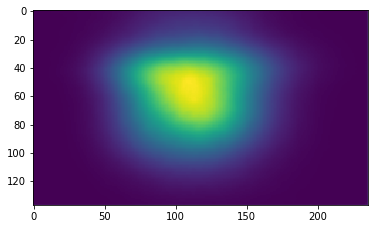

In [76]:
Df_Avg = Df_np[:,:,:].mean(axis = 0)
plt.imshow(Df_Avg)

In [77]:
summary(Df_Avg)

Min: 0.003744274048994224
Mean: 11.217823421353192
Median: 3.281876120294762
Max: 64.85954989046007
STD: 16.03495167250977
1st: 0.01720633339972117
10th: 0.0826727743477395
25th: 0.441894045010954
50th: 3.281876120294762
75th 15.211656044612626
90th: 38.05580362477595
99th: 61.529798844851626


Okay, let's take out any values above the 5th percentile to get a sense, visually, of where the extermes actually lay

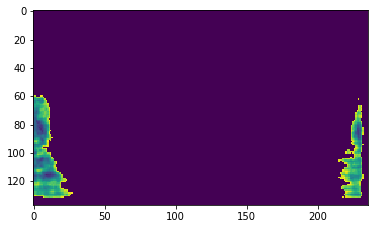

In [78]:
Df_Avg[Df_Avg > np.percentile(Df_Avg,5)] = 0
plt.imshow(Df_Avg)

In [79]:
summary(Df_Avg)

Min: 0.0
Mean: 0.0012315009608413682
Median: 0.0
Max: 0.039334793865763794
STD: 0.005670205994888604
1st: 0.0
10th: 0.0
25th: 0.0
50th: 0.0
75th 0.0
90th: 0.0
99th: 0.03234415455088628


I wonder if it's due to just residual values. So what we will do is reset it, and put and put any value below 40 to zero

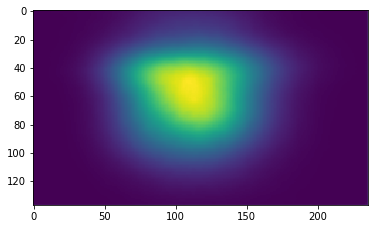

In [80]:
Df_np[Df_np < 40] = 0
Df_Avg = Df_np[:,:,:].mean(axis = 0)
plt.imshow(Df_Avg)

In [81]:
summary(Df_Avg)

Min: 0.003744274048994224
Mean: 11.217823421353192
Median: 3.281876120294762
Max: 64.85954989046007
STD: 16.03495167250977
1st: 0.01720633339972117
10th: 0.0826727743477395
25th: 0.441894045010954
50th: 3.281876120294762
75th 15.211656044612626
90th: 38.05580362477595
99th: 61.529798844851626


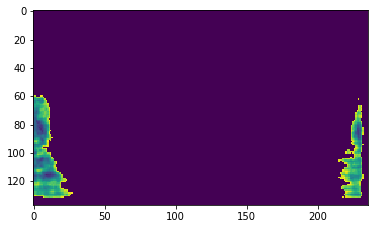

In [82]:
Df_Avg[Df_Avg > np.percentile(Df_Avg,5)] = 0
plt.imshow(Df_Avg)

In [83]:
summary(Df_Avg)

Min: 0.0
Mean: 0.0012315009608413682
Median: 0.0
Max: 0.039334793865763794
STD: 0.005670205994888604
1st: 0.0
10th: 0.0
25th: 0.0
50th: 0.0
75th 0.0
90th: 0.0
99th: 0.03234415455088628


In [70]:
summary(Df_Avg[:,30:206])

Min: 0.0
Mean: 0.00016307256040885742
Median: 0.0
Max: 0.08265285799641506
STD: 0.0034035826576249055
1st: 0.0
10th: 0.0
25th: 0.0
50th: 0.0
75th 0.0
90th: 0.0
99th: 0.0


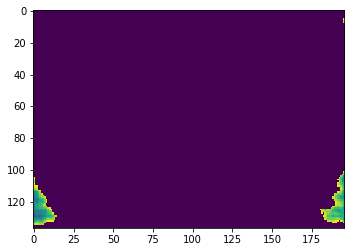

In [68]:
plt.imshow(Df_Avg[:,30:216])

In [16]:
Df_np[:,136,:].shape

(50210, 236)

In [48]:
Df_AVg = Df_np[:,:,:].mean(axis = 0)
Df_Avg_Cent = Df_AVg.copy()

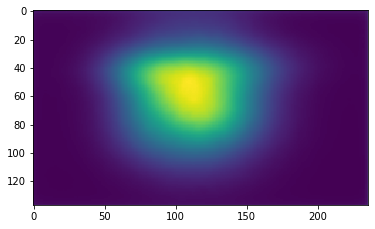

In [49]:
plt.imshow(Df_Avg_Cent)

In [54]:
Df_Avg_Cent[10:117,20:216] = 0

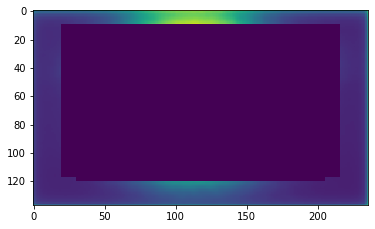

In [55]:
plt.imshow(Df_Avg_Cent)

In [57]:
206-30

176